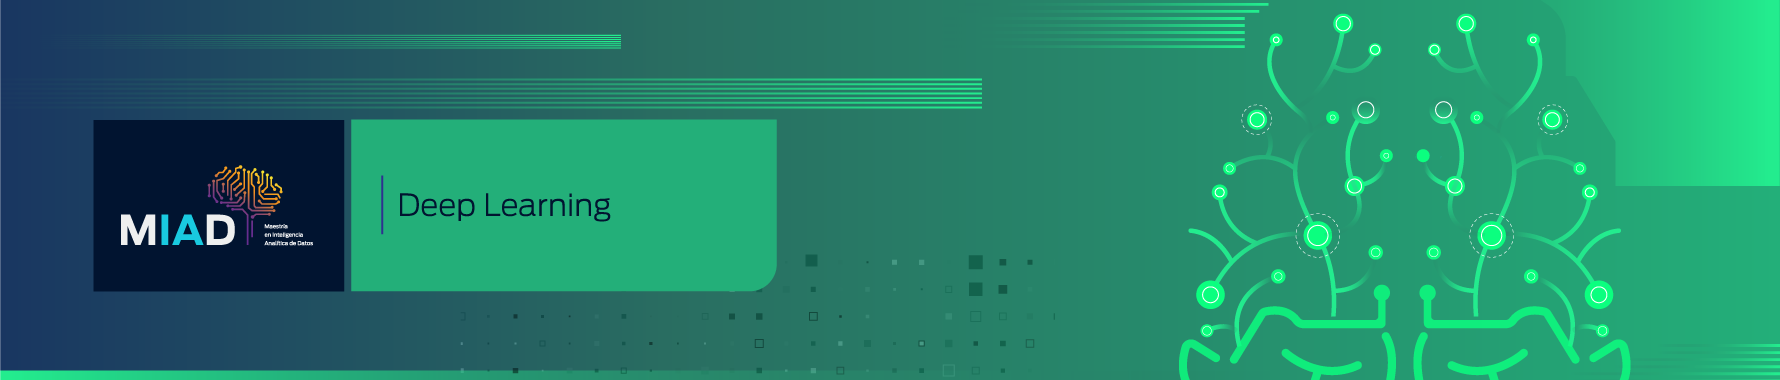

# Music Year Prediction

### Librerias

In [1]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from matplotlib import pyplot  as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras import regularizers
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras import utils
tensorflow.__version__

'2.15.0'

### Cargue de los datos

In [3]:
# Cargar los datos
data = pd.read_csv('trainReg.csv', sep=",")
data_test = pd.read_csv('testReg.csv', sep=",")
data

,ID,Y,V1,V2,V3,V4,V5,V6,V7,V8,...,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90
0,1,2013,44.81144,0.83826,0,7.91314,10.94148,-0.04547,-15.16332,-10.47324,...,-8.44873,-230.30484,-40.94698,48.20025,-0.28694,155.76251,-56.23579,13.62599,123.92018,10.02845
1,2,1998,41.99180,7.99976,0,64.26707,16.54115,-9.28737,-40.73524,33.60440,...,18.68972,-44.06062,52.37792,81.36093,-14.81111,151.66273,-120.61213,10.57519,-3.21078,-1.07438
2,3,1998,42.19196,2.23111,0,65.07719,24.99746,1.76100,6.66573,3.45778,...,-3.69878,-118.95712,54.15529,-23.32168,-9.65067,-83.83055,-141.17594,7.33084,-275.69714,2.35522
3,4,1998,39.28634,-1.85716,0,91.04190,9.08333,0.08502,-5.59216,65.62463,...,20.89044,-18.53135,176.09769,351.33669,3.44682,121.69156,-270.43989,12.51659,-140.88884,-0.23476
4,5,1998,40.36025,2.94918,0,53.83723,13.71369,-8.21964,-40.21636,21.22366,...,19.91979,34.59026,-69.83720,102.31946,8.08807,135.08089,-153.02327,4.09207,-68.33046,-6.19159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77774,96428,2004,33.76706,-3.80678,0,-1.44169,23.78801,5.01781,1.58966,-25.02281,...,-36.84706,-637.31267,-174.93600,127.32951,-15.75226,-144.64697,6.53731,5.54065,193.68594,32.75930
77775,96432,2004,25.77805,2.41861,0,5.96418,-8.43658,-1.36182,2.51784,-18.57770,...,27.76376,-44.59643,-116.15080,-34.33917,4.86612,141.37999,282.57252,23.32459,125.07389,-19.16268
77776,96433,2004,24.78656,1.36415,0,34.13329,34.32996,-0.95170,75.33572,-28.59028,...,33.73262,-206.05602,44.10029,-635.01673,-16.75481,114.74225,-192.79351,-4.44202,1457.72692,-50.93615
77777,96434,2006,39.67698,3.65167,0,34.04925,-0.68467,-2.13911,-5.70096,-10.57862,...,-15.46611,-117.84462,139.93465,67.70637,-24.18488,-39.54694,185.26251,-1.37534,216.14774,-12.75066


### Análisis Preliminar de los Datos

Análisis de los 12 primeros predictores correspondientes al timbre promedio de las canciones en ese año

,Y,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,77779.000000,77779.000000,77779.000000,77779.0,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000
mean,2002.308129,43.425185,-0.136720,0.0,3.755313,-2.339768,-1.643095,-6.814997,-9.587264,3.749572,1.948512,8.674857
std,10.811038,6.128869,4.370466,0.0,17.609183,14.483975,7.898574,22.980515,12.911914,10.638581,6.430093,35.096050
min,1926.000000,4.836880,-69.680870,0.0,-165.221610,-121.475340,-72.503850,-152.407550,-70.693420,-119.487530,-41.631660,-249.107450
25%,1998.000000,40.060315,-2.612435,0.0,-7.016240,-10.685075,-6.300690,-21.265305,-18.583065,-2.289400,-2.270755,-11.115595
50%,2006.000000,44.323850,-0.063000,0.0,2.022100,-2.054560,-1.586240,-6.307610,-11.238330,3.928440,1.897680,10.894150
75%,2010.000000,47.900080,2.465950,0.0,12.776450,6.423900,3.077055,7.617995,-2.329330,10.039325,6.163805,29.762770
max,2014.000000,60.034010,23.815260,0.0,274.658580,160.815220,68.447960,262.068870,112.971410,80.787120,39.976830,262.283040


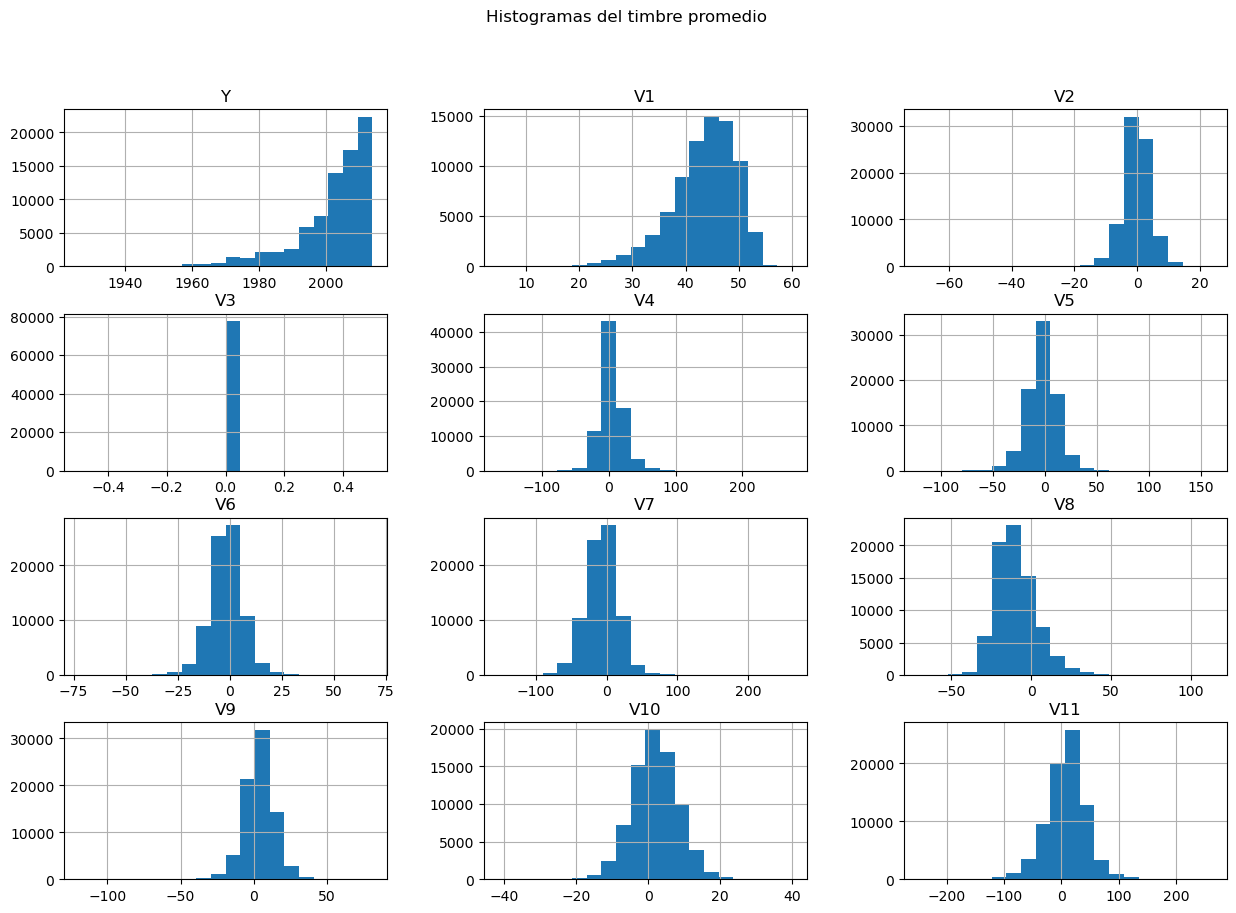

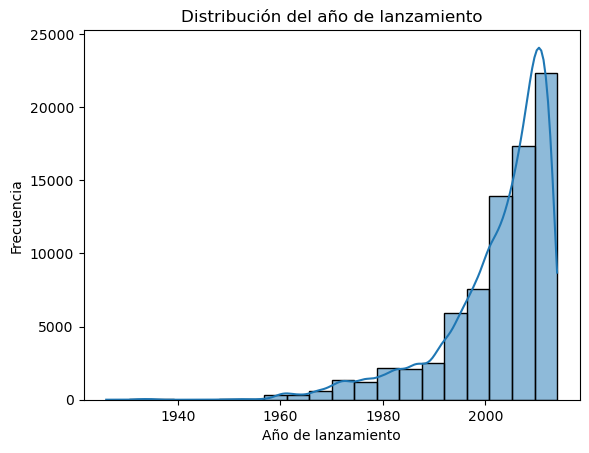

In [4]:
caracteristicas = data.iloc[:, 1:13]  # Seleccionar las columnas correspondientes al timbre promedio
display(caracteristicas.describe())

# Histogramas de las características asociadas al timbre promedio
caracteristicas.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogramas del timbre promedio')
plt.show()

# Análisis de la distribución del año de lanzamiento
sns.histplot(data['Y'], bins=20, kde=True)
plt.title('Distribución del año de lanzamiento')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Frecuencia')
plt.show()


#### Eliminar variables cuya suma es igual a cero

In [5]:
# Calcular la suma de los valores para cada variable
suma_por_variable = data.sum()

# Seleccionar las variables cuya suma es igual a cero
variables_con_suma_cero = suma_por_variable[suma_por_variable == 0].index

# Eliminar las columnas cuya suma es igual a cero
data = data.drop(columns=variables_con_suma_cero)
data_test = data_test.drop(columns=variables_con_suma_cero)

variables_con_suma_cero

Index(['V3'], dtype='object')

In [6]:

print("\033[1mVista preliminar de los datos: \033[0m")
print("Filas:",data.shape[0])
print("Columnas:",data.shape[1])
display(data.head())
print("\033[1mConteo de datos nulos por variable: \033[0m")
display(data.isnull().sum())

print("\033[1mVariables Categóricas: \033[0m")
categorical_columns=data.select_dtypes(include=['object']).columns
print("Variable Categórica: "+categorical_columns)

print("\033[1mVariables Numéricas: \033[0m")
numerical_cols=data.select_dtypes(exclude=['object']).columns
print("Variable numérica: "+numerical_cols)

print("\033[1mFormato variables: \033[0m")
data.info()

Vista preliminar de los datos: 
Filas: 77779
Columnas: 91


,ID,Y,V1,V2,V4,V5,V6,V7,V8,V9,...,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90
0,1,2013,44.81144,0.83826,7.91314,10.94148,-0.04547,-15.16332,-10.47324,14.17212,...,-8.44873,-230.30484,-40.94698,48.20025,-0.28694,155.76251,-56.23579,13.62599,123.92018,10.02845
1,2,1998,41.99180,7.99976,64.26707,16.54115,-9.28737,-40.73524,33.60440,9.18802,...,18.68972,-44.06062,52.37792,81.36093,-14.81111,151.66273,-120.61213,10.57519,-3.21078,-1.07438
2,3,1998,42.19196,2.23111,65.07719,24.99746,1.76100,6.66573,3.45778,-24.42779,...,-3.69878,-118.95712,54.15529,-23.32168,-9.65067,-83.83055,-141.17594,7.33084,-275.69714,2.35522
3,4,1998,39.28634,-1.85716,91.04190,9.08333,0.08502,-5.59216,65.62463,8.33105,...,20.89044,-18.53135,176.09769,351.33669,3.44682,121.69156,-270.43989,12.51659,-140.88884,-0.23476
4,5,1998,40.36025,2.94918,53.83723,13.71369,-8.21964,-40.21636,21.22366,17.16742,...,19.91979,34.59026,-69.83720,102.31946,8.08807,135.08089,-153.02327,4.09207,-68.33046,-6.19159


Conteo de datos nulos por variable: 


ID     0
Y      0
V1     0
V2     0
V4     0
      ..
V86    0
V87    0
V88    0
V89    0
V90    0
Length: 91, dtype: int64

Variables Categóricas: 
Index([], dtype='object')
Variables Numéricas: 
Index(['Variable numérica: ID', 'Variable numérica: Y',
       'Variable numérica: V1', 'Variable numérica: V2',
       'Variable numérica: V4', 'Variable numérica: V5',
       'Variable numérica: V6', 'Variable numérica: V7',
       'Variable numérica: V8', 'Variable numérica: V9',
       'Variable numérica: V10', 'Variable numérica: V11',
       'Variable numérica: V12', 'Variable numérica: V13',
       'Variable numérica: V14', 'Variable numérica: V15',
       'Variable numérica: V16', 'Variable numérica: V17',
       'Variable numérica: V18', 'Variable numérica: V19',
       'Variable numérica: V20', 'Variable numérica: V21',
       'Variable numérica: V22', 'Variable numérica: V23',
       'Variable numérica: V24', 'Variable numérica: V25',
       'Variable numérica: V26', 'Variable numérica: V27',
       'Variable numérica: V28', 'Variable numérica: V29',
       'Variable numérica: V30', 'Variable numérica: V

#### ¿Cuántas canciones tenemos por año?

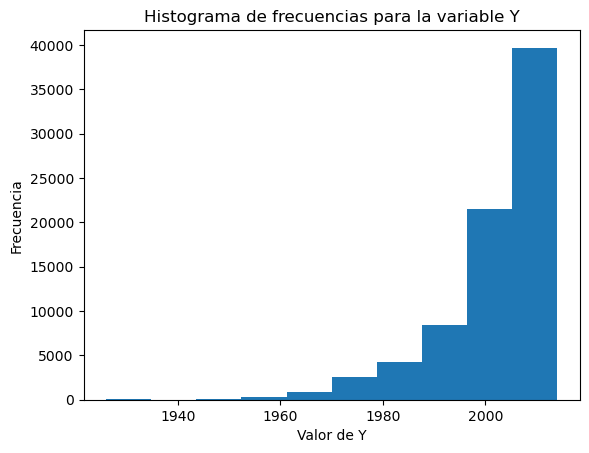

In [7]:
# Access the "Y" column directly (assuming it's a numeric year column)

# Extraer datos de la variable "Y"
data_Y = data["Y"]  # Assuming "Y" is the column name

# Crear histograma
plt.hist(data_Y)

# Personalizar etiquetas
plt.xlabel("Valor de Y")
plt.ylabel("Frecuencia")

# Titulo del gráfico
plt.title("Histograma de frecuencias para la variable Y")

# Mostrar el histograma
plt.show()

Boxplot variable Y: 


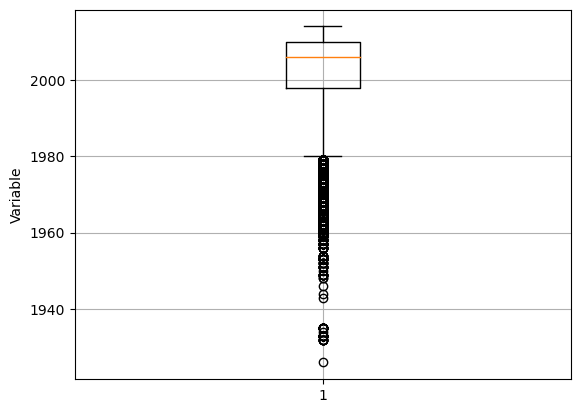

In [8]:
print("\033[1mBoxplot variable Y: \033[0m")
# Crear el boxplot
plt.boxplot(data['Y'])

# Agregar título y etiquetas
plt.ylabel('Variable')
plt.grid(True)

# Mostrar el boxplot
plt.show()

Boxplots: 


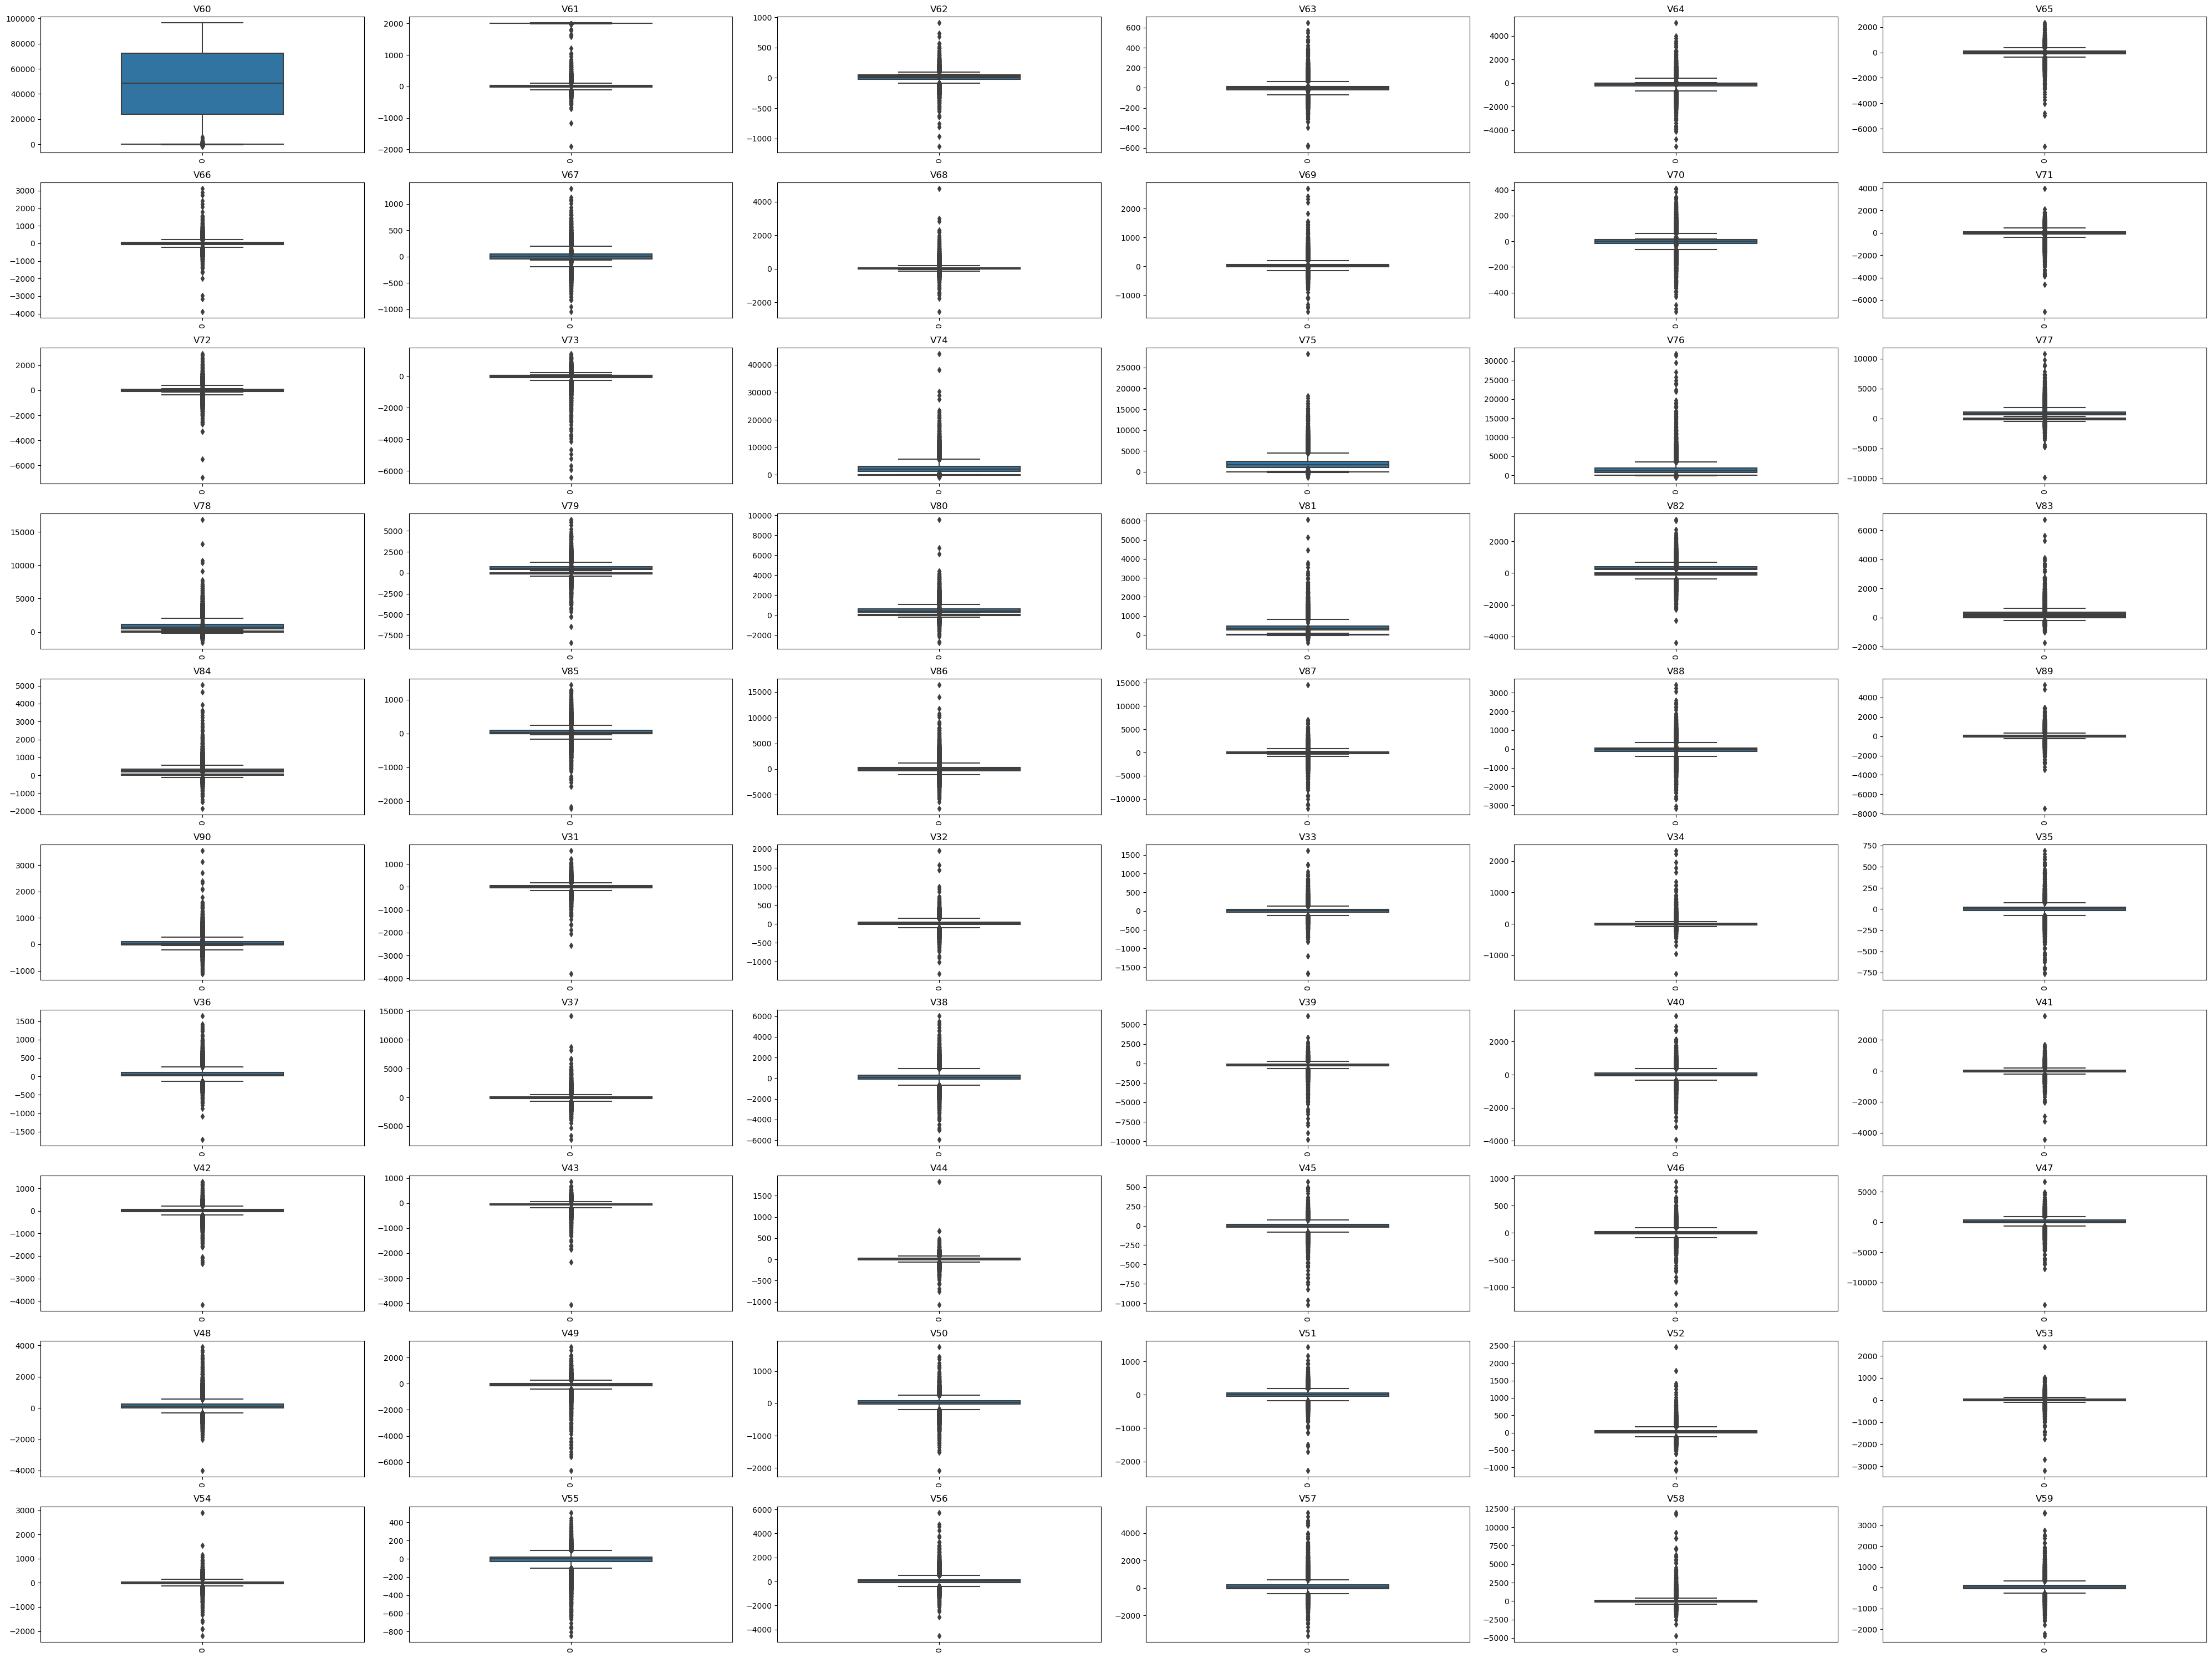

In [12]:
print("\033[1mBoxplots: \033[0m")

# Define la figura
plt.figure(figsize=(40, 30))

# Itera sobre todas las variables numéricas para trazar los boxplots
for i, col in enumerate(data.select_dtypes(exclude=['object'])):
    plt.subplot(10, 6, i % 60 + 1)
    sns.boxplot(data[col], orient="v", width=0.5)
    plt.title(col, fontsize=12)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Preprocesamiento de los datos

In [13]:
#Valida missing values
# Valida missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
display(missing_values)

Series([], dtype: int64)

In [14]:
data.iloc[:, 2:]

,V1,V2,V4,V5,V6,V7,V8,V9,V10,V11,...,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90
0,44.81144,0.83826,7.91314,10.94148,-0.04547,-15.16332,-10.47324,14.17212,10.57382,-11.21128,...,-8.44873,-230.30484,-40.94698,48.20025,-0.28694,155.76251,-56.23579,13.62599,123.92018,10.02845
1,41.99180,7.99976,64.26707,16.54115,-9.28737,-40.73524,33.60440,9.18802,-6.79144,44.21327,...,18.68972,-44.06062,52.37792,81.36093,-14.81111,151.66273,-120.61213,10.57519,-3.21078,-1.07438
2,42.19196,2.23111,65.07719,24.99746,1.76100,6.66573,3.45778,-24.42779,-18.45069,233.16766,...,-3.69878,-118.95712,54.15529,-23.32168,-9.65067,-83.83055,-141.17594,7.33084,-275.69714,2.35522
3,39.28634,-1.85716,91.04190,9.08333,0.08502,-5.59216,65.62463,8.33105,11.70269,79.90772,...,20.89044,-18.53135,176.09769,351.33669,3.44682,121.69156,-270.43989,12.51659,-140.88884,-0.23476
4,40.36025,2.94918,53.83723,13.71369,-8.21964,-40.21636,21.22366,17.16742,0.14463,72.23955,...,19.91979,34.59026,-69.83720,102.31946,8.08807,135.08089,-153.02327,4.09207,-68.33046,-6.19159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77774,33.76706,-3.80678,-1.44169,23.78801,5.01781,1.58966,-25.02281,25.90399,19.87408,-21.41492,...,-36.84706,-637.31267,-174.93600,127.32951,-15.75226,-144.64697,6.53731,5.54065,193.68594,32.75930
77775,25.77805,2.41861,5.96418,-8.43658,-1.36182,2.51784,-18.57770,-25.69885,9.97971,-100.96885,...,27.76376,-44.59643,-116.15080,-34.33917,4.86612,141.37999,282.57252,23.32459,125.07389,-19.16268
77776,24.78656,1.36415,34.13329,34.32996,-0.95170,75.33572,-28.59028,-31.86076,-4.06444,-53.17960,...,33.73262,-206.05602,44.10029,-635.01673,-16.75481,114.74225,-192.79351,-4.44202,1457.72692,-50.93615
77777,39.67698,3.65167,34.04925,-0.68467,-2.13911,-5.70096,-10.57862,-1.30048,9.85726,7.33263,...,-15.46611,-117.84462,139.93465,67.70637,-24.18488,-39.54694,185.26251,-1.37534,216.14774,-12.75066


<Figure size 1500x1000 with 0 Axes>

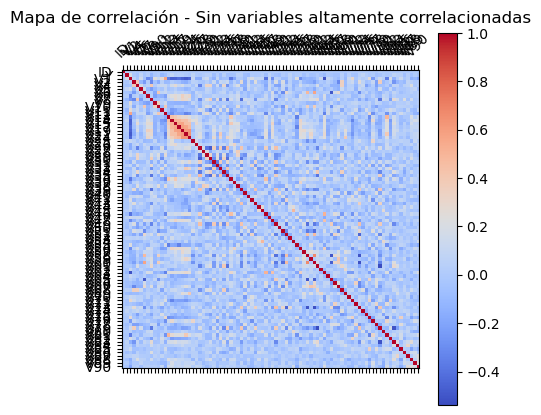

Variables eliminadas: ['V18', 'V16', 'V23', 'V16', 'V23', 'V18', 'V22', 'V20']


In [15]:

# Cálculo de la matriz de correlación de Pearson
matriz_correlacion =  data.iloc[:, 2:].corr(method='pearson')

# Identificación de variables altamente correlacionadas
umbral_correlacion = 0.8  # Umbral de correlación para considerar alta correlación

# Creación de una máscara para identificar variables altamente correlacionadas
mascara_correlacion = np.triu(np.abs(matriz_correlacion) > umbral_correlacion)

# Eliminación de variables altamente correlacionadas
variables_eliminadas = []
for i in range(len(matriz_correlacion)):
    for j in range(i + 1, len(matriz_correlacion)):
        if mascara_correlacion[i, j]:
            variables_eliminadas.append(matriz_correlacion.index[j])
            variables_eliminadas.append(matriz_correlacion.index[i])

# Creación de un nuevo DataFrame sin las variables altamente correlacionadas
data = data.drop(variables_eliminadas, axis=1)
data_test=data_test.drop(variables_eliminadas, axis=1)

# Gráfico de mapa de correlación sin las variables eliminadas
plt.figure(figsize=(15, 10))
plt.matshow(data.corr(), cmap='coolwarm')
plt.xticks(range(len(data.columns)), data.columns, rotation=45)
plt.yticks(range(len(data.columns)), data.columns)
plt.colorbar()
plt.title("Mapa de correlación - Sin variables altamente correlacionadas")
plt.show()

print("Variables eliminadas:", variables_eliminadas)


Luego, partimos la base de datos en una sección de train y otra de test de la siguiente manera: utilizaremos el 80% de los datos para entrenamiento y el 20% restante para evaluación.

In [16]:
X = data.iloc[:, 2:].to_numpy()
y = data.iloc[:, 1].to_numpy()

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

XT = data_test.iloc[:, 1:].to_numpy()
Xtest_scaled = scaler.fit_transform(XT)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Modelo de red neuronal

### Creación de la red

Epoch 1/100
1839/1839 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 3786709.5000 - mae: 1944.0615 - mse: 3786709.5000 - val_loss: 2330109.5000 - val_mae: 1526.4559 - val_mse: 2330109.5000
Epoch 2/100
1839/1839 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 1746063.6250 - mae: 1306.1309 - mse: 1746063.6250 - val_loss: 385389.5625 - val_mae: 620.7642 - val_mse: 385389.5625
Epoch 3/100
1839/1839 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 208999.7656 - mae: 431.9918 - mse: 208999.7656 - val_loss: 2807.2480 - val_mae: 52.6003 - val_mse: 2807.2480
Epoch 4/100
1839/1839 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 916.2196 - mae: 25.0680 - mse: 916.2196 - val_loss: 40.3374 - val_mae: 4.7854 - val_mse: 40.3374
Epoch 5/100
1839/1839 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 40.2989 - mae: 4.8185 - mse: 40.2989 - val_loss: 40.2678 - val_mae: 4.8064 - val_mse: 40.2678
Epoch 6/100
1839/1839 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 39.6680 - mae: 4.7799 - mse: 39.6680 - val_loss: 39.8228 - val_mae: 4.7508 - val_mse

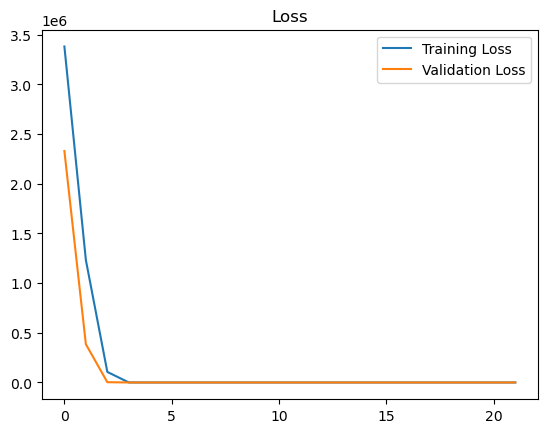

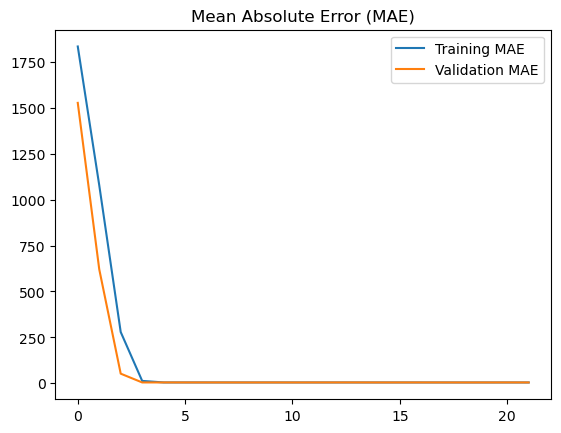

460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MAE on test set: 4.749328127656409
RMSE on test set: 6.310347985990398


In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your preprocessed data (X_train, X_val, y_train, y_val)

np.random.seed(1)

# Define the network
model = tf.keras.Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

# Compilación del modelo
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])  # Add 'mse' for RMSE

# Early stopping 
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plot metricas
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error (MAE)')
plt.legend()
plt.show()

# Metricas MAE y RMSE en test
y_pred = model.predict(X_val)  # Replace X_test with your actual test data

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred)**0.5  # Calculate RMSE from MSE

print('MAE on test set:', mae)
print('RMSE on test set:', rmse)


In [19]:
import datetime

# Obtener la fecha y hora actual
fecha_actual = datetime.datetime.now()

# Construir el nombre del archivo CSV concatenando la fecha y hora actual
nombre_archivo = "predicciones_{}.csv".format(fecha_actual.strftime("%Y%m%d%H%M%S"))

############## Datos de test de Kaggle
y_pred_test = model.predict(Xtest_scaled)  

print(y_pred_test)
y_pred_test=(y_pred_test).astype(int)

data_pred_test= {"ID": data_test['ID'], "Y":y_pred_test.flatten()}
df_export= pd.DataFrame(data_pred_test)
display(df_export.describe())
df_export.to_csv(nombre_archivo,index=False)

584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[2006.437 ]
 [2001.7192]
 [2000.8445]
 ...
 [2000.2126]
 [2000.0085]
 [2004.1456]]


,ID,Y
count,18657.000000,18657.000000
mean,48111.199657,2004.036983
std,27808.170178,4.084473
min,20.000000,1985.000000
25%,24272.000000,2002.000000
50%,47690.000000,2005.000000
75%,72293.000000,2007.000000
max,96436.000000,2025.000000
